# This is Assignment 14 - Ben Smith

#### In the following code cells, I will demonstrate my ability to manipulate, explore, analyze and create visualizations for simple datasets using Python, NumPy, Pandas, Seaborn and Matplotlib. 

We begin with the standard imports required to work with data in these platforms: 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('classic')
import seaborn as sns
sns.set()
from datetime import timedelta
plt.style.use('seaborn-white')

Next we import some data acquired from the City of Austin's open data web portal, data.austintexas.gov. The first dataset is Austin Animal Center (AAC) Intakes from Oct, 1st 2013 to present, and the second is Animal Center Outcomes from Oct, 1st 2013 to present. According to data.austintexas.gov, "All animals receive a unique Animal ID during intake. Annually over 90% of animals entering the center, are adopted, transferred to rescue or returned to their owners. The Outcomes data set reflects that Austin, TX. is the largest "No Kill" city in the country."

In [2]:
intakes = pd.read_csv('data/Austin_Animal_Center_Intakes.csv')
outcomes = pd.read_csv('data/Austin_Animal_Center_Outcomes.csv')

Now we preview the data using head()

In [3]:
intakes.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


In [4]:
outcomes.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,05/08/2019 06:20:00 PM,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,07/18/2018 04:02:00 PM,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A720371,Moose,02/13/2016 05:59:00 PM,02/13/2016 05:59:00 PM,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
3,A674754,NaN,03/18/2014 11:47:00 AM,03/18/2014 11:47:00 AM,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby
4,A689724,*Donatello,10/18/2014 06:52:00 PM,10/18/2014 06:52:00 PM,08/01/2014,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black


## Cleaning and Manipulating the Data

Since the intake information and the outcome information are contained in separate datasets, but (presumably) contain information about many of the same animals, our first task will be to combine these datasets so that the information about intake and outcome can be analyzed together. Before we can do this however, we will need to change the names of some of the columns in order to distinguish between intake data and outcome data in the final combined dataset. 

In [5]:
# changing column names
intakes_new = intakes.rename(columns={'Name':'Name upon Intake', 'DateTime':'Intake DateTime', 
                                      'MonthYear':'Intake MonthYear', 'Breed':'Breed upon Intake',
                                      'Color':'Color upon Intake', 'Animal Type': 'Animal Type upon Intake'})
outcomes_new = outcomes.rename(columns={'DateTime':'Outcome DateTime', 'MonthYear':'Outcome MonthYear',})

In [6]:
# combining the datasets
aac = pd.merge(intakes_new, outcomes_new)

Now, chances are that the animal's name, type, breed, and color did not change during it's stay at AAC, so we'll drop the columns that contain this information upon intake, leaving only this information upon outcome. We'll also drop the duplicate DateTime and MonthYear columns. 

In [7]:
# dropping unneccesary columns

aac = aac.drop(['Name upon Intake', 'Animal Type upon Intake', 'Breed upon Intake', 
                'Color upon Intake', 'Intake MonthYear', 'Outcome MonthYear'], axis=1)

Now let's rearrange the columns into an order that is a little more intuitive.

In [8]:
# outputting a list of column names
cols = list(aac.columns.values)
cols

['Animal ID',
 'Intake DateTime',
 'Found Location',
 'Intake Type',
 'Intake Condition',
 'Sex upon Intake',
 'Age upon Intake',
 'Name',
 'Outcome DateTime',
 'Date of Birth',
 'Outcome Type',
 'Outcome Subtype',
 'Animal Type',
 'Sex upon Outcome',
 'Age upon Outcome',
 'Breed',
 'Color']

In [9]:
# putting the columns in the desired order

aac = aac[['Animal ID', 'Name', 'Animal Type', 'Breed', 'Color', 'Date of Birth',
           'Intake DateTime', 'Found Location', 'Intake Type', 'Intake Condition', 'Sex upon Intake', 'Age upon Intake',
           'Outcome DateTime', 'Outcome Type', 'Outcome Subtype', 'Sex upon Outcome', 'Age upon Outcome',]]

Next we will make the data more useful by converting the DateTime and Date of Birth columns from string format to a datetime format, which will allow us to perform time series based operations. 

In [10]:
# string to datetime conversions
aac['Intake DateTime'] = pd.to_datetime(aac['Intake DateTime'])
aac['Outcome DateTime'] = pd.to_datetime(aac['Outcome DateTime'])
aac['Date of Birth'] = pd.to_datetime(aac['Date of Birth'])

In [11]:
# view the data type of each column
aac.dtypes

Animal ID                   object
Name                        object
Animal Type                 object
Breed                       object
Color                       object
Date of Birth       datetime64[ns]
Intake DateTime     datetime64[ns]
Found Location              object
Intake Type                 object
Intake Condition            object
Sex upon Intake             object
Age upon Intake             object
Outcome DateTime    datetime64[ns]
Outcome Type                object
Outcome Subtype             object
Sex upon Outcome            object
Age upon Outcome            object
dtype: object

Now that we have our DateTime data in a usable format, we can add a column to the dataset indicating how long each animal remained at Austin Animal Center. 

In [12]:
length_of_stay = aac['Outcome DateTime'] - aac['Intake DateTime']

In [13]:
# creating the new column
length_of_stay = aac['Outcome DateTime'] - aac['Intake DateTime']
aac = aac.assign(LengthOfStay = length_of_stay)

#adjusting the column name
aac = aac.rename(columns={'LengthOfStay':'Length of Stay'})

Another piece of information that would be more useful in a different format is the age data. As strings, this is difficult to work with, but as time deltas it could prove useful. Here we will work on converting it. 

In [14]:
# Use regular expressions to convert the strings as they are written into a format that is readable by the 
# to_timedelta() function. 
aac = aac.replace(regex=['years', 'year'], value='Y')
aac = aac.replace(regex=['months', 'month'], value='M')
aac = aac.replace(regex=['weeks', 'week'], value='W')

In [15]:
# Convert the data to timedelta type
aac['Age upon Intake'] = pd.to_timedelta(aac['Age upon Intake'])
aac['Age upon Outcome'] = pd.to_timedelta(aac['Age upon Outcome'])

Here is a preview of our new DataFrame:

In [16]:
aac.head(3)

,Animal ID,Name,Animal Type,Breed,Color,Date of Birth,Intake DateTime,Found Location,Intake Type,Intake Condition,Sex upon Intake,Age upon Intake,Outcome DateTime,Outcome Type,Outcome Subtype,Sex upon Outcome,Age upon Outcome,Length of Stay
0,A786884,*Brock,Dog,Beagle Mix,Tricolor,2017-01-03,2019-01-03 16:19:00,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Neutered Male,730 days 11:38:24,2019-01-08 15:11:00,Transfer,Partner,Neutered Male,730 days 11:38:24,4 days 22:52:00
1,A706918,Belle,Dog,English Springer Spaniel,White/Liver,2007-07-05,2015-07-05 12:59:00,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Spayed Female,2921 days 22:33:36,2015-07-05 15:13:00,Return to Owner,NaN,Spayed Female,2921 days 22:33:36,0 days 02:14:00
2,A724273,Runster,Dog,Basenji Mix,Sable/White,2015-04-17,2016-04-14 18:43:00,2818 Palomino Trail in Austin (TX),Stray,Normal,Intact Male,0 days 00:11:00,2016-04-21 17:17:00,Return to Owner,NaN,Neutered Male,365 days 05:49:12,6 days 22:34:00


## Visualizing the Data

Now that our data is in more usable formats, we can begin doing some basic visualizations to get a feel for what the data can tell us. 

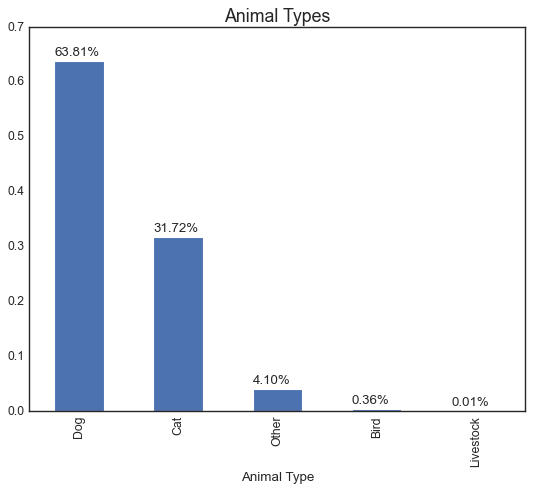

In [17]:
by_type = aac.groupby('Animal Type').count()['Animal ID']

by_type_barchart = (by_type.sort_values(ascending=False).div(by_type.sum(0), axis=0)).plot(kind='bar')
plt.title("Animal Types",fontsize=16)

# this loop adds annotations at the top of each bar
for p in by_type_barchart.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    by_type_barchart.annotate('{:.2%}'.format(height), (x, y + height + 0.01))

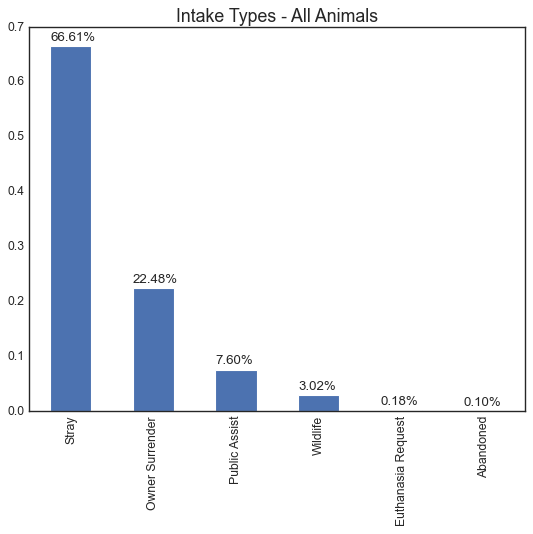

In [18]:
by_intake = aac.groupby('Intake Type').count()['Animal ID']

by_intake_barchart = (by_intake.sort_values(ascending=False).div(by_intake.sum(0), axis=0)).plot(kind='bar')
plt.title("Intake Types - All Animals",fontsize= 16)
plt.xlabel(None)

# this loop adds annotations at the top of each bar
for p in by_intake_barchart.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    by_intake_barchart.annotate('{:.2%}'.format(height), (x, y + height + 0.01))

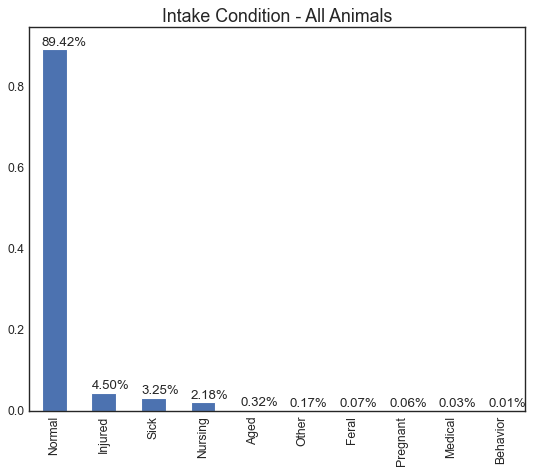

In [19]:
by_condition = aac.groupby('Intake Condition').count()['Animal ID']

by_condition_barchart = (by_condition.sort_values(ascending=False).div(by_condition.sum(0), axis=0)).plot(kind='bar')
plt.title("Intake Condition - All Animals",fontsize= 16)
plt.ylim(0, .95)
plt.xlabel(None)

# this loop adds annotations at the top of each bar
for p in by_condition_barchart.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    by_condition_barchart.annotate('{:.2%}'.format(height), (x, y + height + 0.01))

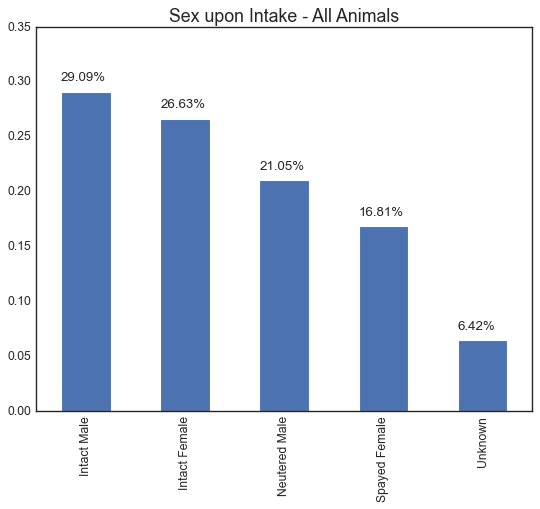

In [20]:
intake_sex = aac.groupby('Sex upon Intake').count()['Animal ID']

intake_sex_barchart = (intake_sex.sort_values(ascending=False).div(intake_sex.sum(0), axis=0)).plot(kind='bar')
plt.title("Sex upon Intake - All Animals",fontsize= 16)
plt.ylim(0, .35)
plt.xlabel(None)

# this loop adds annotations at the top of each bar
for p in intake_sex_barchart.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    intake_sex_barchart.annotate('{:.2%}'.format(height), (x, y + height + 0.01))

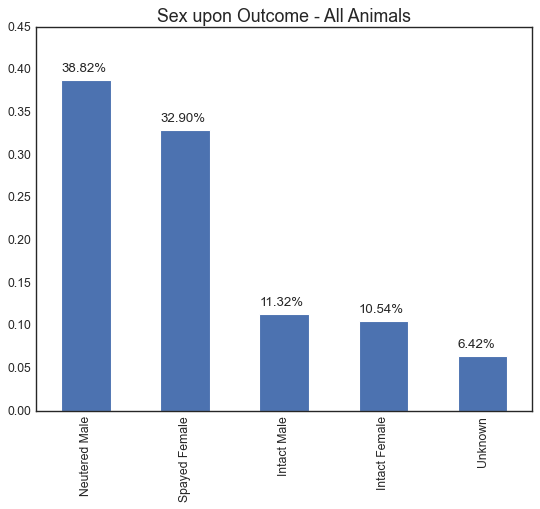

In [21]:
outcome_sex = aac.groupby('Sex upon Outcome').count()['Animal ID']

outcome_sex_barchart = (outcome_sex.sort_values(ascending=False).div(outcome_sex.sum(0), axis=0)).plot(kind='bar')
plt.title("Sex upon Outcome - All Animals",fontsize= 16)
plt.ylim(0, .45)
plt.xlabel(None)

# this loop adds annotations at the top of each bar
for p in outcome_sex_barchart.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    outcome_sex_barchart.annotate('{:.2%}'.format(height), (x, y + height + 0.01))

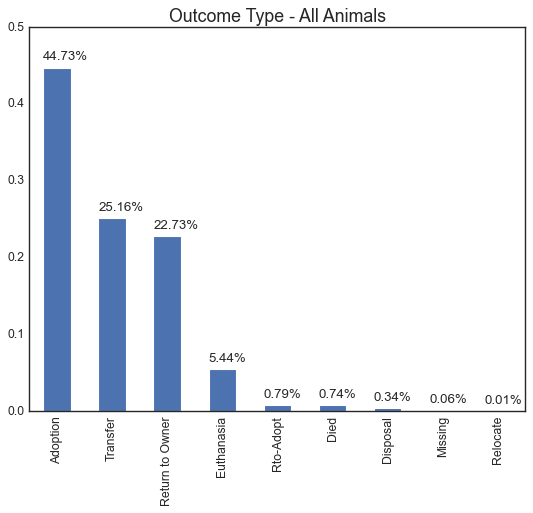

In [22]:
by_outcome = aac.groupby('Outcome Type').count()['Animal ID']

by_outcome_barchart = (by_outcome.sort_values(ascending=False).div(by_outcome.sum(0), axis=0)).plot(kind='bar')
plt.title("Outcome Type - All Animals",fontsize= 16)
plt.ylim(0, .5)
plt.xlabel(None)

# this loop adds annotations at the top of each bar
for p in by_outcome_barchart.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    by_outcome_barchart.annotate('{:.2%}'.format(height), (x, y + height + 0.01))

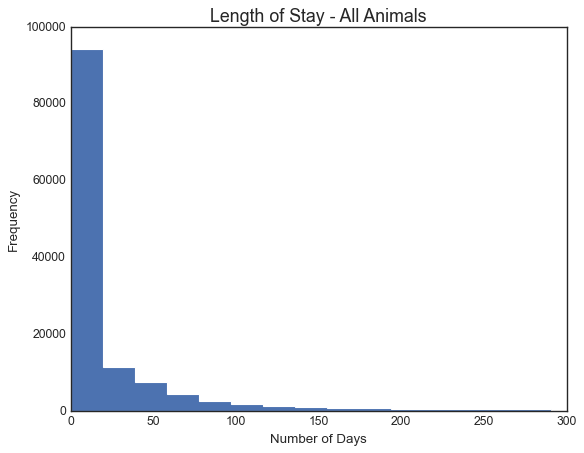

In [23]:
# creating a new dataframe that excludes the negative timedelta values 
# (which areare likely a result of data that was input incorrectly or a result of an error in joining the two datasets)
aac2 = aac[aac['Length of Stay'] > timedelta(days=0, seconds=0, microseconds=0, milliseconds=0, minutes=0, hours=0, weeks=0)]

# converting the length of stay timedelta data to a float format that can be used for further visualizations
stay_timedeltas = aac2['Length of Stay']
stay = (stay_timedeltas / pd.Timedelta(days=1))

# removing outliers
stay = stay[stay.between(stay.quantile(0), stay.quantile(.95))]

# creating the plot
plt.hist(stay, bins=15, histtype='stepfilled')
plt.xlabel('Number of Days')
plt.ylabel('Frequency')
plt.title('Length of Stay - All Animals', fontsize=16);

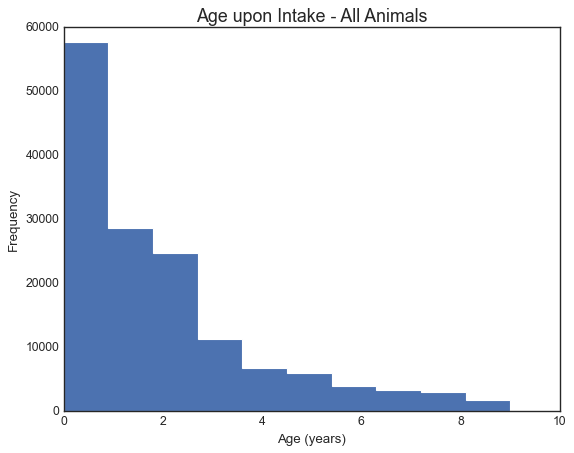

In [24]:
# converting the age timedelta data to a float format that can be used for further visualizations
intake_age_timedeltas = aac['Age upon Intake']
intake_ages = (intake_age_timedeltas / pd.Timedelta(days=1) / 365)

# removing negative values and outliers
intake_ages = intake_ages[intake_ages > 0]
intake_ages = intake_ages[intake_ages.between(intake_ages.quantile(0), intake_ages.quantile(.95))]

# creating the plot
plt.hist(intake_ages, histtype='stepfilled')
plt.title('Age upon Intake - All Animals', fontsize=16)
plt.xlabel('Age (years)')
plt.ylabel('Frequency');

## Answering Questions with the Data

Now that we have a basic feel for the dataset, we can begin to use it to answer some interesting questions. We'll start with a relatively simple one: Which is more likely to be adopted, a cat or a dog?

In [25]:
# setting up the data in a new DataFrame

dogs = aac[aac['Animal Type'] == 'Dog']
dogs_outcome = dogs.groupby('Outcome Type').count()['Animal ID']

cats = aac[aac['Animal Type'] == 'Cat']
cats_outcome = cats.groupby('Outcome Type').count()['Animal ID']

dogs_cats_outcome = pd.DataFrame({'Outcome Type': cats_outcome.index,
                                  'Cats': cats_outcome,
                                  'Cats Proportion': cats_outcome.div(cats_outcome.sum(0), axis=0), #displaying proportions instead of absolute values
                                  'Dogs': dogs_outcome,
                                  'Dogs Proportion': dogs_outcome.div(dogs_outcome.sum(0), axis=0)})#displaying proportions instead of absolute values

dogs_cats_outcome

,Outcome Type,Cats,Cats Proportion,Dogs,Dogs Proportion
Adoption,Adoption,22694,0.465508,45346.0,0.462375
Died,Died,664,0.013620,268.0,0.002733
Disposal,Disposal,69,0.001415,31.0,0.000316
Euthanasia,Euthanasia,1920,0.039384,2024.0,0.020638
Missing,Missing,38,0.000779,49.0,0.000500
Relocate,Relocate,1,0.000021,NaN,NaN
Return to Owner,Return to Owner,2656,0.054481,32198.0,0.328310
Rto-Adopt,Rto-Adopt,140,0.002872,1070.0,0.010910
Transfer,Transfer,20569,0.421920,17086.0,0.174219


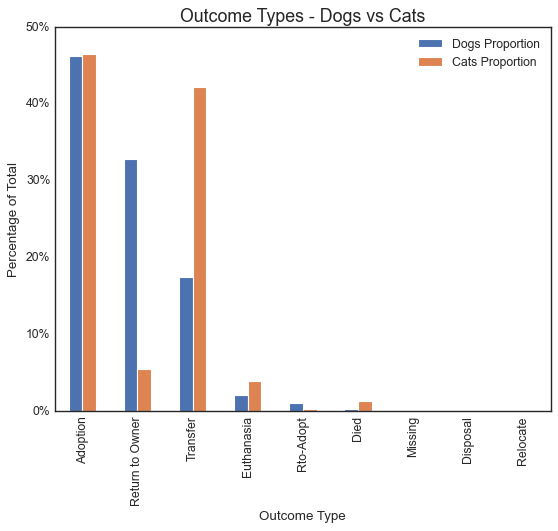

In [26]:
# creating the plot
dogs_cats_outcome_chart = dogs_cats_outcome.sort_values(by='Dogs', ascending=False).plot(x='Outcome Type', y = ['Dogs Proportion', 'Cats Proportion'], kind='bar')
plt.title('Outcome Types - Dogs vs Cats', fontsize=16)
plt.xlabel('Outcome Type')
plt.ylabel('Percentage of Total')

# changing y axis ticks to percentages instead of decimal proportions
yticks = dogs_cats_outcome_chart.get_yticks()
dogs_cats_outcome_chart.set_yticklabels(['{:,.0%}'.format(x) for x in yticks])

dogs_cats_outcome_chart;

From this, we can see that dogs and cats are nearly equally likely to be adopted. However, their chances of a particular outcome become much different when we look at the other outcome types. For example, it appears that dogs are far more likely to be returned to their owners, while cats are more likely to be transfered to another institution. Further, it appears that cats are slightly more likely to be euthanized, though to know more about this we would likely need to control for other variables such as intake condition. (An additional caveat to this data is that we have not done any statistical calculations to determine the significance of these differences or the various margins for error). 

We could also use a similar plot to look at the differences between Sex upon Intake vs Sex upon Outcome. This would give us some idea of the number of animals that are neutered/spayed while at the shelter. 

In [27]:
# setting up the data in a new DataFrame
intake_sex = aac.groupby('Sex upon Intake').count()['Animal ID']
outcome_sex = aac.groupby('Sex upon Outcome').count()['Animal ID']

fixed = pd.DataFrame({'Sex': intake_sex.index,
                      'Intake': intake_sex,
                      'Intake Proportion': intake_sex.div(intake_sex.sum(0), axis=0), #displaying proportions instead of absolute values
                      'Outcome': outcome_sex,
                      'Outcome Proportion': outcome_sex.div(outcome_sex.sum(0), axis=0)}) #displaying proportions instead of absolute values

fixed

,Sex,Intake,Intake Proportion,Outcome,Outcome Proportion
Intact Female,Intact Female,40930,0.266308,16197,0.105386
Intact Male,Intact Male,44712,0.290916,17403,0.113233
Neutered Male,Neutered Male,32352,0.210496,59659,0.388172
Spayed Female,Spayed Female,25839,0.168120,50572,0.329048
Unknown,Unknown,9861,0.064160,9861,0.064161


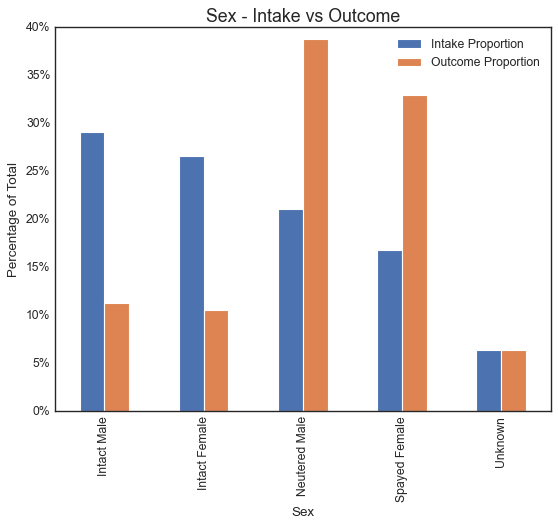

In [28]:
# creating the plot
fixed_plot = fixed.sort_values(by='Intake', ascending=False).plot(x='Sex', y=['Intake Proportion', 'Outcome Proportion'], kind='bar')
plt.title('Sex - Intake vs Outcome', fontsize=16)
plt.ylabel('Percentage of Total')

# changing y axis ticks to percentages instead of decimal proportions
yticks = fixed_plot.get_yticks()
fixed_plot.set_yticklabels(['{:,.0%}'.format(x) for x in yticks]);

With this relatively simple analysis of this data, we can see that the percentage of neutered/spayed animals is much higher upon outcome than upon intake, suggesting that a large number of the animals are fixed during their stay at the shelter. We could, of course, do a more precise analysis of this data by directly comparing each individual animals sex/status upon intake with that of the same animal upon outcome, and this would more accurately and precisely tell us what percentage of animals are fixed during their stay. However, this chart gives us a basic understanding. 

## Requirement 4

I would assign a grade of 'C' to this assignment. I put in a substantial amount of time and effort into creating what is displayed here. However, I believe that my work is lacking in complexity, and the type of analysis I have demonstrated here would not actually be of any real value to this hypothetical data company. For these reasons, I believe this assignment deserves a mid-level grade. 

## Requirement 5

In completing this assignment I came to the realization that, during the previous assignments, I was able to follow along and produce the output required by the assignment, but did not have a deep or thorough understanding of the programming involved to create the output. Therefore, when I was faced with the task of producing similar outputs from scratch with a new, real-world set of data, I had to essentially re-learn the programming aspects all over again. However, after doing this "re-learning" and creating the code from scratch, I have come to a deeper understanding of the concepts. Further, because I was having to learn these things from scratch, I spent nearly two full days creating what is displayed here, and unfortunatley did not have enough to time to do a more comprehensive walkthrough of the variety of concepts that were covered throughout the course. Also, I had hoped to be able to use basemap to create a density visualization of the "found locations" throughout Austin, but was unsuccessfuly in my attempts to install basemap, using both WinPython and Anaconda; unfortunately, these attempts also ate up an hour or two of my time. 